In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#Logistic Regression
from sklearn import linear_model

#Neural Network
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import tensorflow as tf
from keras import optimizers
from keras import losses
import keras 

#SVM
from sklearn import svm

In [12]:
data = pd.read_csv('ASL_data_Numeric_labels_with_empty_backg_30x30_1000samp_number_only.csv')
data = data.dropna()
print(data.shape)
#Convert dataframe data into a numpy array
df = np.array(data.values)
#Select first column for the labels/y
y = df[:,0]
#Select remaining columns as x data(pixel array)
X = df[:,1:]
print(y.shape, x.shape)

(11000, 901)
(11000,) (11000, 900)


# Logistic Regression

# Support Vector Machine (SVM)

In [13]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

# Convolutional Neural Network

In [14]:
#Reinitialize data
#Scaling the features to help the algorithm converge, we will scale the data to have a mean of 0 and unit variance
X_scale = StandardScaler()
X = X_scale.fit_transform(x)

#X[0,:] # Looking the new features after scaling

#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,shuffle=True)
x_train = X_train.reshape(X_train.shape[0],30,30,1)
x_test = X_test.reshape(X_test.shape[0],30,30,1)
#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 7.4352e-04 - val_mean_squared_error: 7.4352e-04
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 5.1901e-04 - mean_squared_error: 5.1901e-04 - val_loss: 3.4978e-04 - val_mean_squared_error: 3.4978e-04
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 9.2094e-05 - mean_squared_error: 9.2094e-05 - val_loss: 6.8348e-05 - val_mean_squared_error: 6.8348e-05
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3402e-05 - mean_squared_error: 2.3402e-05 - val_loss: 9.34

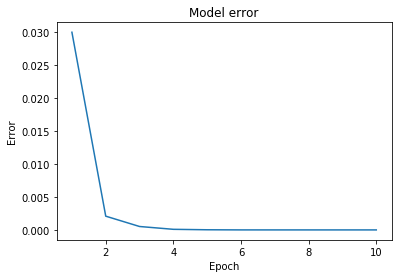

In [15]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test,y_test))
print(history.history)
model.summary()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1,11),history.history['mean_squared_error'])
# plt.plot(range(1,11),history.history['val_mean_squared_error'])
plt.title('Model error')
plt.ylabel('Error')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()